In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
features = [x for x in df.columns if x not in "target"]

In [5]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [6]:
len(features)

13

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(df[features],df["target"],train_size=0.8,random_state=55)
print("X train size",x_train.shape)
print("y train size",y_train.shape)
print("X validation size",x_val.shape)
print("X validation size",y_val.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X train size (820, 13)
y train size (820,)
X validation size (205, 13)
X validation size (205,)


In [8]:
min_samples_split_list = [2,10,30,50,100,200,300,400,500,600,700,800]
max_depth_list= [1,2,3,4,8,16,32,64,None]

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

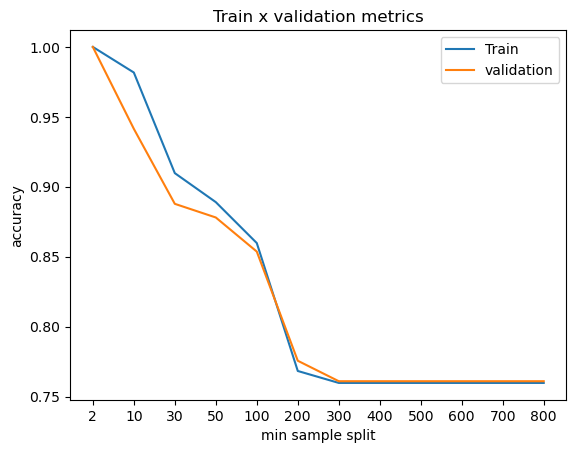

In [10]:
train_accuracy_list = []
val_accuracy_list = []
for min_sample_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split= min_sample_split, random_state = 55)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("min sample split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])

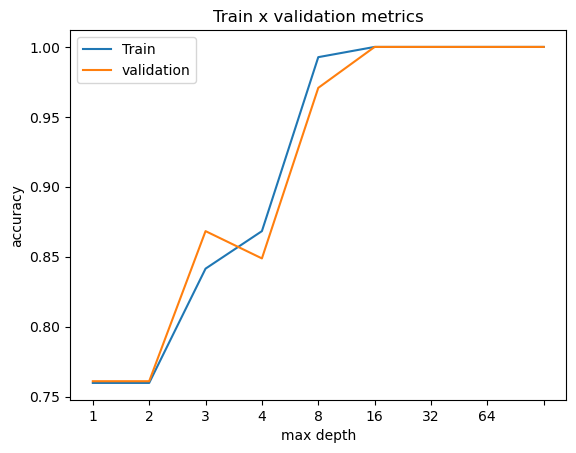

In [11]:
train_accuracy_list = []
val_accuracy_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth= max_depth, random_state = 55)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])

In [12]:
model = DecisionTreeClassifier(min_samples_split=100,max_depth= 5, random_state = 55)
model.fit(x_train,y_train)
train_prediction = model.predict(x_train)
val_prediction = model.predict(x_val)
print(accuracy_score(train_prediction,y_train))
print(accuracy_score(val_prediction,y_val))

0.8597560975609756
0.8536585365853658
